# Flight Price Prediction
---------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Exploratory Data Analysis

### 1. Missing Values

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.shape

(10682, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### 2. Data Cleaning and Feature Extraction

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.#### 

#### # Date_of_Journey

In [10]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [13]:
weekday = [0,1,2,3,4]
train_data['is_weekend'] = pd.to_datetime(train_data['Date_of_Journey']).dt.dayofweek.map(lambda x: 1 if x not in weekday else 0)

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,is_weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,0


In [43]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

#### Dep_Time

In [16]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,1,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,0,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,0,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,0,16,50


In [50]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

#### # Arrival_Time


Here we cannot directly write the below code some are arrived the next day also so we need to find out the arrival date also

train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour                                                            
train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [21]:
train_data['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [22]:
arr = list(train_data["Arrival_Time"])
c=0
k=0
for i in range(len(arr)):
    if len(arr[i].split()) >= 2:
        arr[i]=arr[i][0:8]
        
        c=c+1
    elif len(arr[i].split()) == 1:
        arr[i]=arr[i].strip()+" 00"
        k=k+1
print(c)
print(k)

4334
6348


In [23]:
4334+6348

10682

In [25]:
arr[:20] #00 means arrived at the same day as journey day

['01:10 22',
 '13:15 00',
 '04:25 10',
 '23:30 00',
 '21:35 00',
 '11:25 00',
 '10:25 13',
 '05:05 02',
 '10:25 13',
 '19:15 00',
 '23:00 00',
 '22:55 00',
 '13:55 00',
 '09:20 10',
 '19:50 00',
 '19:15 04',
 '13:15 00',
 '12:35 13',
 '19:15 13',
 '12:35 28']

In [26]:
day=list(train_data['Journey_day'])

In [27]:
day[:20]

[24, 1, 9, 12, 1, 24, 12, 1, 12, 27, 1, 18, 24, 9, 24, 3, 15, 12, 12, 27]

In [29]:
arr_hours = []
arr_mins = []
arr_day=[]
for i,j in zip(arr,day):
    arr_hours.append(int(i[0:2]))    # Extract hours from duration
    arr_mins.append(int(i[3:5]))
    if i[-2:]=='00':
        arr_day.append(int(j))
    else:
        arr_day.append(int(i[-2:]))

In [30]:
print(arr_hours[:20])
print(arr_mins[:20])
print(arr_day[:20])

[1, 13, 4, 23, 21, 11, 10, 5, 10, 19, 23, 22, 13, 9, 19, 19, 13, 12, 19, 12]
[10, 15, 25, 30, 35, 25, 25, 5, 25, 15, 0, 55, 55, 20, 50, 15, 15, 35, 15, 35]
[22, 1, 10, 12, 1, 24, 13, 2, 13, 27, 1, 18, 24, 10, 24, 4, 15, 13, 13, 28]


In [31]:
train_data["Arrival_hours"] = arr_hours
train_data["Arrival_mins"] = arr_mins
train_data["Arrival_day"] = arr_day

In [32]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_hours,Arrival_mins,Arrival_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,1,22,20,1,10,1,10,22
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,1,5,50,13,15,13,15,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,6,0,9,25,4,25,4,25,10
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,12,5,0,18,5,23,30,23,30,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,3,0,16,50,21,35,21,35,1


In [44]:
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)


While looking at the data we assumed some disimilarities in the journey date and the arrival date i.e in some cases arrival date was larger than journey date. Lets have a look on such cases.

In [34]:
filt=(train_data['Journey_day']>train_data['Arrival_day'])

In [35]:
train_data[filt]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_hours,Arrival_mins,Arrival_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,1,22,20,1,10,1,10,22
21,Air India,21/03/2019,Banglore,New Delhi,BLR → COK → DEL,22:00,13:20 19 Mar,15h 20m,1 stop,No info,...,21,3,0,22,0,13,20,13,20,19
110,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,05:05 16 Mar,15h,1 stop,No info,...,18,3,0,14,5,5,5,5,5,16
379,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,09:00 16 Mar,16h 5m,1 stop,In-flight meal not included,...,18,3,0,16,55,9,0,9,0,16
605,Air India,21/03/2019,Banglore,New Delhi,BLR → COK → DEL,22:00,10:50 19 Mar,12h 50m,1 stop,No info,...,21,3,0,22,0,10,50,10,50,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10441,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,11:40,08:15 16 Mar,20h 35m,1 stop,No info,...,18,3,0,11,40,8,15,8,15,16
10489,IndiGo,15/03/2019,Chennai,Kolkata,MAA → CCU,22:05,00:30 13 Mar,2h 25m,non-stop,No info,...,15,3,0,22,5,0,30,0,30,13
10590,Air Asia,24/03/2019,Banglore,New Delhi,BLR → DEL,23:25,02:10 22 Mar,2h 45m,non-stop,No info,...,24,3,1,23,25,2,10,2,10,22
10638,Jet Airways,21/03/2019,Banglore,New Delhi,BLR → BOM → DEL,21:25,11:25 19 Mar,14h,1 stop,In-flight meal not included,...,21,3,0,21,25,11,25,11,25,19



We can eliminate such cases considering them as outliers as they may supply wrong information

In [36]:
train_data.drop(index=train_data[filt].index, inplace=True)

In [37]:
train_data.shape

(10593, 21)

In [51]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_hours,Arrival_mins,Arrival_day,Duration_hours,Duration_mins
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,13,15,13,15,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,4,25,4,25,10,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,0,18,5,23,30,23,30,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,21,35,21,35,1,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,0,9,0,11,25,11,25,24,2,25


#### # Duration

In [39]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [40]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [45]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [52]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_hours,Arrival_mins,Arrival_day,Duration_hours,Duration_mins
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,13,15,13,15,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,4,25,4,25,10,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,0,18,5,23,30,23,30,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,21,35,21,35,1,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,0,9,0,11,25,11,25,24,2,25


### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

#### # Airline

In [47]:
train_data["Airline"].value_counts()

Jet Airways                          3788
IndiGo                               2048
Air India                            1732
Multiple carriers                    1196
SpiceJet                              817
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

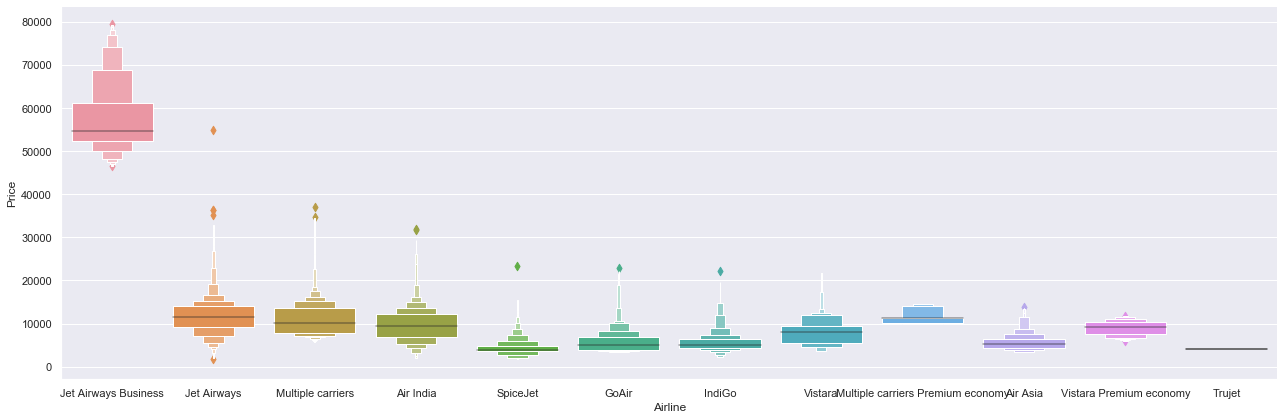

In [48]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


In [49]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0


#### # Source

In [53]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2110
Mumbai       696
Chennai      380
Name: Source, dtype: int64

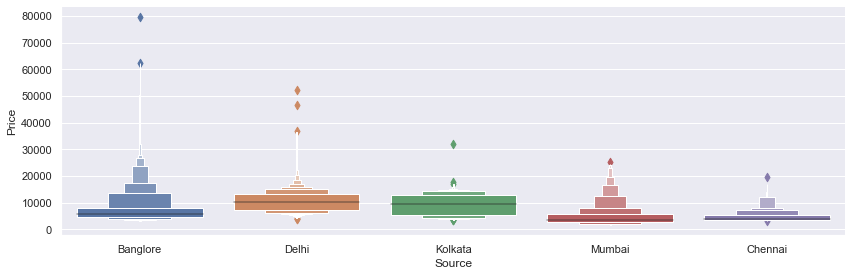

In [54]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [55]:

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


#### # Destination

In [56]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     845
Hyderabad     696
Kolkata       380
Name: Destination, dtype: int64

In [57]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


#### # Route

In [58]:
train_data["Route"]

1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10593, dtype: object


As Total_stops and Route gives the same information we can drop this feature 

In [59]:
train_data.drop(["Route"], axis = 1, inplace = True)

#### # Additional_Info

In [60]:
train_data['Additional_Info'].value_counts()

No info                         8293
In-flight meal not included     1944
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Majority records shows no information hence this feature is barely of any use so we can drop this feature also

In [61]:
train_data.drop(["Additional_Info"], axis = 1, inplace = True)

#### # Total_stops

In [62]:
train_data["Total_Stops"].value_counts()

1 stop      5555
non-stop    3483
2 stops     1509
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [63]:
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [64]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_hours,Arrival_mins,Arrival_day,Duration_hours,Duration_mins
1,Air India,Kolkata,Banglore,2,7662,1,5,1,5,50,13,15,13,15,1,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,0,9,25,4,25,4,25,10,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,0,18,5,23,30,23,30,12,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,0,16,50,21,35,21,35,1,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,0,9,0,11,25,11,25,24,2,25


In [65]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [66]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [71]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,2,7662,1,5,1,5,50,13,15,13,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,0,9,25,4,25,4,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,0,18,5,23,30,23,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,0,16,50,21,35,21,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,0,9,0,11,25,11,...,0,0,0,1,0,0,0,0,0,0


In [74]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10593 entries, 1 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10593 non-null  int64
 1   Price                                      10593 non-null  int64
 2   Journey_day                                10593 non-null  int64
 3   Journey_month                              10593 non-null  int64
 4   is_weekend                                 10593 non-null  int64
 5   Dep_hour                                   10593 non-null  int64
 6   Dep_min                                    10593 non-null  int64
 7   Arrival_hour                               10593 non-null  int64
 8   Arrival_min                                10593 non-null  int64
 9   Arrival_hours                              10593 non-null  int64
 10  Arrival_mins                               105

In [72]:
data_train.shape

(10593, 34)

In [76]:
data_train[['Arrival_hour','Arrival_min','Arrival_hours','Arrival_mins']]

,Arrival_hour,Arrival_min,Arrival_hours,Arrival_mins
1,13,15,13,15
2,4,25,4,25
3,23,30,23,30
4,21,35,21,35
5,11,25,11,25
...,...,...,...,...
10678,22,25,22,25
10679,23,20,23,20
10680,11,20,11,20
10681,14,10,14,10


In [78]:
data_train.drop(['Arrival_hours','Arrival_mins'], axis = 1, inplace = True)

In [79]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,2,7662,1,5,1,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,0,9,25,4,25,10,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,0,18,5,23,30,12,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,0,16,50,21,35,1,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,0,9,0,11,25,24,...,0,0,0,1,0,0,0,0,0,0


In [80]:
data_train.shape

(10593, 32)

### Test Data



In [70]:
test_data = pd.read_excel(r"Test_set.xlsx")

In [73]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [81]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
weekday = [0,1,2,3,4]
test_data['is_weekend'] = pd.to_datetime(test_data['Date_of_Journey']).dt.dayofweek.map(lambda x: 1 if x not in weekday else 0)
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
arr = list(test_data["Arrival_Time"])
c=0
k=0
for i in range(len(arr)):
    if len(arr[i].split()) >= 2:
        arr[i]=arr[i][0:8]
        
        c=c+1
    elif len(arr[i].split()) == 1:
        arr[i]=arr[i].strip()+" 00"
        k=k+1

day=list(test_data['Journey_day'])

arr_hours = []
arr_mins = []
arr_day=[]
for i,j in zip(arr,day):
    arr_hours.append(int(i[0:2]))    # Extract hours from duration
    arr_mins.append(int(i[3:5]))
    if i[-2:]=='00':
        arr_day.append(int(j))
    else:
        arr_day.append(int(i[-2:]))

test_data["Arrival_hours"] = arr_hours
test_data["Arrival_mins"] = arr_mins
test_data["Arrival_day"] = arr_day
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [82]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hours,Arrival_mins,Arrival_day,Duration_hours,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,0,17,30,4,25,7,10,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,0,6,20,10,20,12,4,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,0,19,15,19,0,22,23,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,0,8,0,21,0,21,13,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,0,23,55,2,45,25,2,...,0,0,0,0,0,0,1,0,0,0


In [83]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_day                        2671 non-null   int64
 2   Journey_month                      2671 non-null   int64
 3   is_weekend                         2671 non-null   int64
 4   Dep_hour                           2671 non-null   int64
 5   Dep_min                            2671 non-null   int64
 6   Arrival_hours                      2671 non-null   int64
 7   Arrival_mins                       2671 non-null   int64
 8   Arrival_day                        2671 non-null   int64
 9   Duration_hours                     2671 non-null   int64
 10  Duration_mins                      2671 non-null   int64
 11  Air India                          2671 non-null   uint8
 12  GoAir               

### Training

In [85]:
train=data_train.copy()

In [86]:
train.shape

(10593, 32)

In [88]:
X = train.drop('Price', axis=1)
y = train['Price']

In [89]:
X.head()

,Total_Stops,Journey_day,Journey_month,is_weekend,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Arrival_day,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,2,1,5,1,5,50,13,15,1,7,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,0,9,25,4,25,10,19,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,0,18,5,23,30,12,5,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,0,16,50,21,35,1,4,...,0,0,0,0,0,0,0,0,0,1
5,0,24,6,0,9,0,11,25,24,2,...,0,0,0,1,0,0,0,0,0,0


In [90]:
y.head()

1     7662
2    13882
3     6218
4    13302
5     3873
Name: Price, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [93]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
y_pred = reg_rf.predict(X_test)

In [95]:
reg_rf.score(X_train, y_train)

0.9547863871452218

In [96]:
reg_rf.score(X_test, y_test)

0.8232592201083458

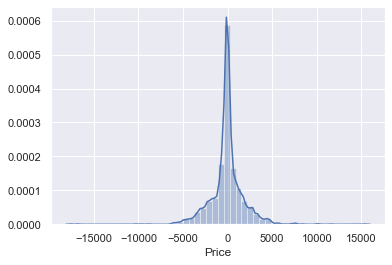

In [97]:
sns.distplot(y_test-y_pred)
plt.show()

In [98]:
from sklearn import metrics

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1163.4671516144047
MSE: 3597007.198524332
RMSE: 1896.5777596830383


In [100]:
metrics.r2_score(y_test, y_pred)

0.8232592201083458

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [103]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [104]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [105]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  11.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [106]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [107]:
prediction = rf_random.predict(X_test)

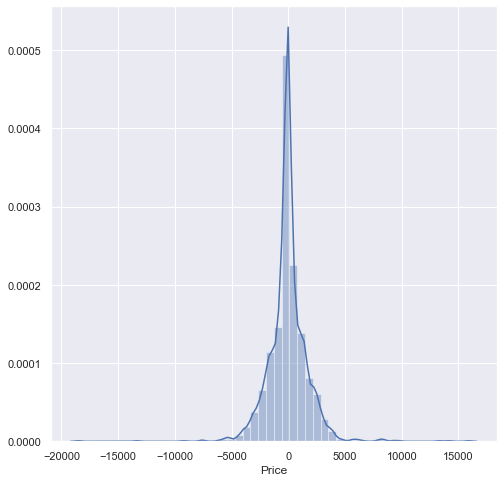

In [108]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

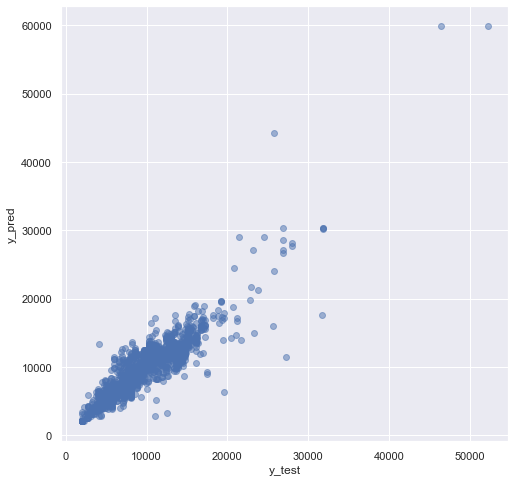

In [109]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [112]:
rf_random.score(X_train, y_train)


-1902362.7950027483

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1118.5620017190472
MSE: 3133838.0065294923
RMSE: 1770.2649537652528


In [113]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [116]:
model = open(r'flight_rf.pkl','rb')
forest = pickle.load(model)

In [117]:
y_prediction = forest.predict(X_test)

In [118]:
metrics.r2_score(y_test, y_prediction)

0.8232592201083458

In [120]:
file = open('flight_rf_final.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [121]:
model = open('flight_rf_final.pkl','rb')
forest2 = pickle.load(model)

In [122]:
y_prediction = forest2.predict(X_test)

In [123]:
metrics.r2_score(y_test, y_prediction)

0.846017274150756

In [124]:
file=open('prediction.pkl','wb')
pickle.dump(rf_random, file)
mode=open('prediction.pkl','rb')
a=pickle.load(mode)
ii=a.predict(X_test)

metrics.r2_score(y_test, y_prediction)

0.846017274150756